## Libraries 

In [1]:
import geopandas as gpd
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from rasterstats import zonal_stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")

%matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Folders 

In [4]:
%pwd

'/home/apoorval/Research/GeoSpatial/India_Forests/Code'

In [5]:
#%% Read in data
rice_root = '/home/apoorval/Research/GeoSpatial/India_Forests/'
dbox_root = '/home/alal/Dropbox/1_Research/India_Forests/'
root = rice_root
code = root + 'Code'
data = root + 'Data'

In [6]:
# root = '/home/apoorval/Research/India_Forests/'
# root = '/home/alal/Dropbox/1_Research/India_Forests/'
%cd $root
%ls Data/Spatial/Rasters/

/home/apoorval/Research/GeoSpatial/India_Forests
downloader.sh
forest_rasters.txt
Hansen_GFC-2017-v1.5_datamask_20N_070E.tif
Hansen_GFC-2017-v1.5_datamask_20N_080E.tif
Hansen_GFC-2017-v1.5_datamask_30N_080E.tif
Hansen_GFC-2017-v1.5_datamask_30N_090E.tif
Hansen_GFC-2017-v1.5_datamask_40N_070E.tif
Hansen_GFC-2017-v1.5_lossyear_20N_070E.tif
Hansen_GFC-2017-v1.5_lossyear_20N_080E.tif
Hansen_GFC-2017-v1.5_lossyear_30N_070E.tif
Hansen_GFC-2017-v1.5_lossyear_30N_080E.tif
Hansen_GFC-2017-v1.5_lossyear_30N_090E.tif
Hansen_GFC-2017-v1.5_lossyear_40N_070E.tif
Hansen_GFC-2017-v1.5_treecover2000_20N_070E.tif
Hansen_GFC-2017-v1.5_treecover2000_20N_080E.tif
Hansen_GFC-2017-v1.5_treecover2000_30N_080E.tif
Hansen_GFC-2017-v1.5_treecover2000_30N_090E.tif
Hansen_GFC-2017-v1.5_treecover2000_40N_070E.tif
_Hansen_GFC_lossyear_all.tif
india-annual-winter-cropped-area-2001-2016-1km/


In [7]:
%ls Data/Spatial/Vectors/
%ls Data/Spatial/Vectors/2001/

2001/         IND_adm1.csv  IND_adm1.shp  IND_adm2.csv  IND_adm2.shp
2011/         IND_adm1.dbf  IND_adm1.shx  IND_adm2.dbf  IND_adm2.shx
IND_adm1.cpg  IND_adm1.prj  IND_adm2.cpg  IND_adm2.prj  Loksabha/
BLOCKMAP.dbf                       STATE/
BLOCKMAP.prj                       STATE.dbf
BLOCKMAP.sbn                       STATE.prj
BLOCKMAP.sbx                       STATE.sbn
BLOCKMAP.shp                       STATE.sbx
BLOCKMAP.shx                       STATE.shp
DISTRICT/                          STATE.shx
DISTRICT.dbf                       SUBDISTRICT/
DISTRICT.prj                       SUB DISTRICT.dbf
DISTRICT.sbn                       SUB DISTRICT.prj
DISTRICT.sbx                       SUB DISTRICT.sbn
DISTRICT.shp                       SUB DISTRICT.sbx
DISTRICT.shx                       SUB DISTRICT.shp
DISTRICT.xml                       SUB DISTRICT.shx
IND_2001_PHC_Questionnaire_EN.pdf  TAHSIL/
IndiaMap2001.pdf                   TOWN/
RAILWAY/                           villa

In [8]:
blocks = gpd.read_file('Data/Spatial/Vectors/2001/BLOCKMAP.shp')

In [9]:
blocks.shape

(6348, 171)

In [10]:
statenames = [s for s in list(blocks.STATE_UT.unique()) if s is not None]
statenames

['Jammu & Kashmir',
 'Himachal Pradesh',
 'Punjab',
 'Uttranchal',
 'Haryana',
 'Chandigarh',
 'Uttar Pradesh',
 'Rajasthan',
 'Arunachal  Pradesh',
 'Delhi',
 'Sikkim',
 'Assam',
 'Bihar',
 'West Bengal',
 'Nagaland',
 'Madhya Pradesh',
 'Meghalaya',
 'Manipur',
 'Jharkhand',
 'Gujarat',
 'Mizoram',
 'Tripura',
 'Chhattisgarh',
 'Orissa',
 'Maharashtra',
 'Daman & Diu',
 'Andhra Pradesh',
 'Karnataka',
 'Pondicherry',
 'Goa',
 'Tamilnadu',
 'Kerala',
 'Dadra & Nagar Haveli',
 'Lakshdweep',
 'Andaman & Nicobar']

In [11]:
state_list = [
    'Orissa', 'Maharashtra', 'Rajasthan', 'Jharkhand', 'Chhattisgarh',
    'Madhya Pradesh', 'Gujarat', 'Himachal Pradesh', 'Andhra Pradesh'
]

### Subset block map to 9 states 

In [12]:
blocks_state = blocks[blocks.STATE_UT.isin(state_list)]
blocks_state.shape

(2983, 171)

In [13]:
del blocks

In [14]:
len(blocks_state.STATE_UT.unique())

9

In [15]:
blocks_state.columns

Index(['BLOCK_ID', 'NAME', 'DISTRICT', 'STATE_UT', 'C_CODE01', 'TOT_NM_HH',
       'TOT_POP', 'M_POP', 'F_POP', 'TOT_L6',
       ...
       'U_T_MRG_HH', 'U_M_MRG_HH', 'U_F_MRG_HH', 'U_T_MRG_OT', 'U_M_MRG_OT',
       'U_F_MRG_OT', 'U_TOT_NNW', 'U_M_NNW', 'U_F_NNW', 'geometry'],
      dtype='object', length=171)

In [16]:
keepcols = [
    'BLOCK_ID', 'NAME', 'DISTRICT', 'STATE_UT', 'C_CODE01',
    'TOT_NM_HH', 'TOT_POP', 'geometry'
]

blocks_state = blocks_state[keepcols]

In [17]:
blocks_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2983 entries, 87 to 6344
Data columns (total 8 columns):
BLOCK_ID     2983 non-null int64
NAME         2983 non-null object
DISTRICT     2983 non-null object
STATE_UT     2983 non-null object
C_CODE01     2983 non-null object
TOT_NM_HH    2983 non-null int64
TOT_POP      2983 non-null int64
geometry     2983 non-null object
dtypes: int64(3), object(5)
memory usage: 209.7+ KB


#### Jharkhand 

In [18]:
jharkhand = blocks_state.loc[blocks_state.STATE_UT == 'Jharkhand', :]
jharkhand.shape

(210, 8)

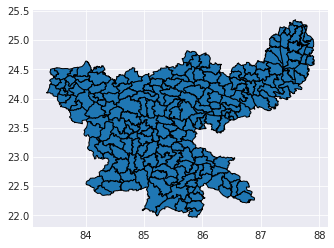

In [19]:
jharkhand.plot(edgecolor='k')

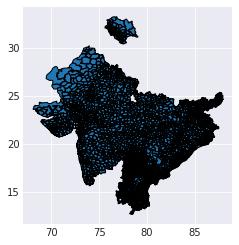

In [20]:
blocks_state.plot(edgecolor='k')

## Ingest forest data into Matrix

[data source](http://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.5.html)

In [21]:
deforestation = 'Data/Spatial/Rasters/Hansen_GFC-2017-v1.5_lossyear_30N_080E.tif'
ex_ante       = 'Data/Spatial/Rasters/Hansen_GFC-2017-v1.5_treecover2000_30N_080E.tif'

In [22]:
with rasterio.open(deforestation) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00025, 0.0, 80.0,
       0.0, -0.00025, 30.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [23]:
with rasterio.open(ex_ante) as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00025, 0.0, 80.0,
       0.0, -0.00025, 30.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


### Raster merge 

### Ex-Ante Forests 

In [28]:
jharkhand_base = gpd.GeoDataFrame.from_features(
    zonal_stats(jharkhand, ex_ante, prefix='ex_ante_',
                                      nodata=-1,
                                      geojson_out=True))

In [29]:
jharkhand_base.head()

,BLOCK_ID,C_CODE01,DISTRICT,NAME,STATE_UT,TOT_NM_HH,TOT_POP,ex_ante_count,ex_ante_max,ex_ante_mean,ex_ante_min,geometry
0,2700,2009000100000000,Sahibganj,Sahibganj,Jharkhand,23435,139809,252636,89.0,0.053338,0.0,"POLYGON ((87.55495999999999 25.33256, 87.55497..."
1,2776,2009000200000000,Sahibganj,Mandro,Jharkhand,11738,59780,300901,85.0,3.805690,0.0,"POLYGON ((87.49936 25.26223, 87.49997 25.2614,..."
2,2784,2009000500000000,Sahibganj,Taljhari,Jharkhand,13272,64092,371876,85.0,2.428568,0.0,"POLYGON ((87.69373 25.24182, 87.69523 25.24213..."
3,2792,2008000100000000,Godda,Meherma,Jharkhand,20109,115855,184829,45.0,0.143084,0.0,"POLYGON ((87.33932 25.21538, 87.34236 25.21533..."
4,2807,2008000200000000,Godda,Thakur Gangti,Jharkhand,13890,77505,131469,45.0,0.201979,0.0,"POLYGON ((87.4269 25.21345, 87.42697 25.2134, ..."


/home/apoorval/.conda/envs/gds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


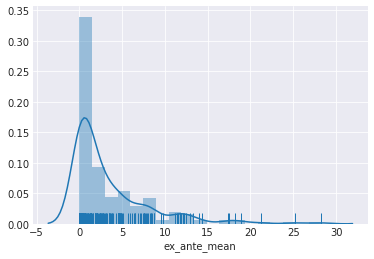

In [30]:
sns.distplot(jharkhand_base.ex_ante_mean,kde=True,rug=True)

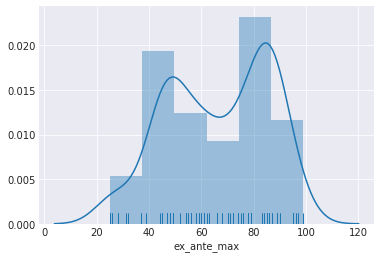

In [33]:
sns.distplot(jharkhand_base.ex_ante_max,kde=True,rug=True)

/home/apoorval/.conda/envs/gds/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
/home/apoorval/.conda/envs/gds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


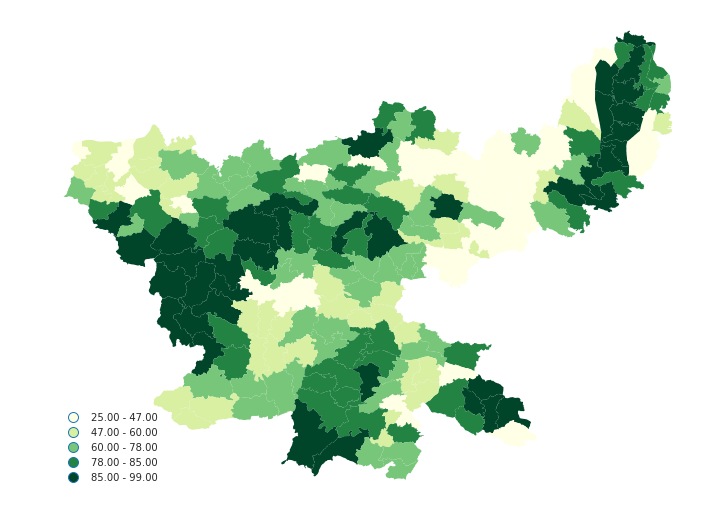

In [34]:
f, ax = plt.subplots(1, figsize=(12, 12))
jharkhand_base.plot(column='ex_ante_max',
                             scheme='QUANTILES', alpha=1, k=5, cmap=plt.cm.YlGn, 
                             ax = ax, legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
plt.axis('off');

### Deforestation 

In [35]:
jharkhand_deforestation = gpd.GeoDataFrame.from_features(zonal_stats(jharkhand, 
                                      deforestation, prefix='def_',
                                      nodata=-99,stats='count', categorical=True,  
                                      geojson_out=True))

In [37]:
jharkhand_deforestation.head()

,BLOCK_ID,C_CODE01,DISTRICT,NAME,STATE_UT,TOT_NM_HH,TOT_POP,def_0,def_1,def_10,...,def_2,def_3,def_4,def_5,def_6,def_7,def_8,def_9,def_count,geometry
0,2700,2009000100000000,Sahibganj,Sahibganj,Jharkhand,23435,139809,252541,NaN,NaN,...,NaN,1.0,16.0,2.0,NaN,1.0,2.0,2.0,252636,"POLYGON ((87.55495999999999 25.33256, 87.55497..."
1,2776,2009000200000000,Sahibganj,Mandro,Jharkhand,11738,59780,299960,10.0,31.0,...,NaN,51.0,5.0,23.0,33.0,24.0,18.0,142.0,300901,"POLYGON ((87.49936 25.26223, 87.49997 25.2614,..."
2,2784,2009000500000000,Sahibganj,Taljhari,Jharkhand,13272,64092,370537,128.0,109.0,...,5.0,4.0,3.0,45.0,34.0,43.0,28.0,290.0,371876,"POLYGON ((87.69373 25.24182, 87.69523 25.24213..."
3,2792,2008000100000000,Godda,Meherma,Jharkhand,20109,115855,184829,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184829,"POLYGON ((87.33932 25.21538, 87.34236 25.21533..."
4,2807,2008000200000000,Godda,Thakur Gangti,Jharkhand,13890,77505,131468,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131469,"POLYGON ((87.4269 25.21345, 87.42697 25.2134, ..."


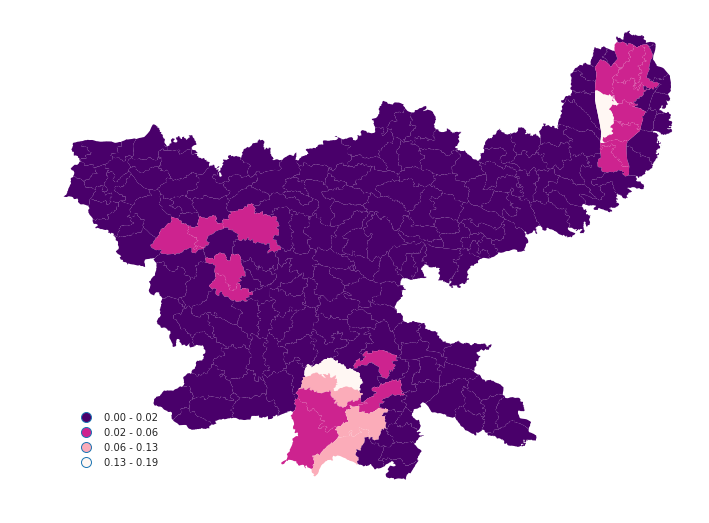

In [46]:
f, ax = plt.subplots(1, figsize=(12, 12))
jharkhand_deforestation.plot(column='def_mean',
                             scheme='fisher_jenks', alpha=1, k=4, cmap=plt.cm.RdPu_r, 
                             ax = ax, legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))
plt.axis('off');